<a href="https://colab.research.google.com/github/vsvale/Spark-for-Machine-Learning-AI/blob/main/Spark_for_Machine_Learning_%26_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
!git clone https://github.com/vsvale/Spark-for-Machine-Learning-AI.git

Cloning into 'Spark-for-Machine-Learning-AI'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


# Employee Dataset

In [ ]:
employee = spark.read.csv('/content/Spark-for-Machine-Learning-AI/datasets/employee.txt',header=True,quote="'")

In [ ]:
employee.show(5)

+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
| id|last_name|               email|gender|department|start_date|salary|           job_title|region_id|
+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
|  1|   Kelley|rkelley0@soundclo...|Female| Computers| 10/2/2009| 67470| Structural Engineer|        2|
|  2|Armstrong|sarmstrong1@infos...|  Male|    Sports| 3/31/2008| 71869|   Financial Advisor|        2|
|  3|     Carr|fcarr2@woothemes.com|  Male|Automotive| 7/12/2009|101768|  Recruiting Manager|        3|
|  4|   Murray|     jmurray3@gov.uk|Female|  Jewelery|12/25/2014| 96897|Desktop Support T...|        3|
|  5|    Ellis|jellis4@sciencedi...|Female|   Grocery| 9/19/2002| 63702|Software Engineer...|        7|
+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
only showing top 5 rows



In [ ]:
employee.take(5)

[Row(id='1', last_name='Kelley', email='rkelley0@soundcloud.com', gender='Female', department='Computers', start_date='10/2/2009', salary='67470', job_title='Structural Engineer', region_id='2'),
 Row(id='2', last_name='Armstrong', email='sarmstrong1@infoseek.co.jp', gender='Male', department='Sports', start_date='3/31/2008', salary='71869', job_title='Financial Advisor', region_id='2'),
 Row(id='3', last_name='Carr', email='fcarr2@woothemes.com', gender='Male', department='Automotive', start_date='7/12/2009', salary='101768', job_title='Recruiting Manager', region_id='3'),
 Row(id='4', last_name='Murray', email='jmurray3@gov.uk', gender='Female', department='Jewelery', start_date='12/25/2014', salary='96897', job_title='Desktop Support Technician', region_id='3'),
 Row(id='5', last_name='Ellis', email='jellis4@sciencedirect.com', gender='Female', department='Grocery', start_date='9/19/2002', salary='63702', job_title='Software Engineer III', region_id='7')]

In [ ]:
employee.printSchema()

root
 |-- id: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- department: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- region_id: string (nullable = true)



In [ ]:
employee.columns

['id',
 'last_name',
 'email',
 'gender',
 'department',
 'start_date',
 'salary',
 'job_title',
 'region_id']

In [ ]:
employee.count()

1000

# Amostra do Dataset

In [ ]:
sample_df = employee.sample(False,0.1,seed=1) 
sample_df.show(5)

+---+---------+--------------------+------+-----------+----------+------+--------------------+---------+
| id|last_name|               email|gender| department|start_date|salary|           job_title|region_id|
+---+---------+--------------------+------+-----------+----------+------+--------------------+---------+
|  4|   Murray|     jmurray3@gov.uk|Female|   Jewelery|12/25/2014| 96897|Desktop Support T...|        3|
| 19|      Day|rdayi@chronoengin...|  Male|Electronics| 9/22/2004|109890|            VP Sales|        3|
| 21|   Bryant|sbryantk@wundergr...|Female| Industrial| 8/12/2005| 78052| Software Consultant|        3|
| 25| Stephens|    jstephenso@ow.ly|  Male|       Toys|  6/4/2004| 70613|Business Systems ...|        1|
| 51|    Dixon|    jdixon1e@dot.gov|  Male|       Baby| 9/26/2006|106281|    Senior Developer|        3|
+---+---------+--------------------+------+-----------+----------+------+--------------------+---------+
only showing top 5 rows



In [ ]:
sample_df.count()

105

In [ ]:
from pyspark.sql.functions import col

In [ ]:
managers_df = employee.filter(col('salary')>= 100000)
managers_df.show(5)

+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
| id|last_name|               email|gender|department|start_date|salary|           job_title|region_id|
+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
|  3|     Carr|fcarr2@woothemes.com|  Male|Automotive| 7/12/2009|101768|  Recruiting Manager|        3|
|  6| Phillips| bphillips5@time.com|  Male|     Tools| 8/21/2013|118497| Executive Secretary|        1|
|  9|    James|rjames8@prnewswir...|  Male|  Jewelery|  9/7/2005|108657|     Sales Associate|        2|
| 10|  Sanchez|rsanchez9@cloudfl...|  Male|    Movies| 3/13/2013|108093|Sales Representative|        1|
| 11|   Jacobs| jjacobsa@sbwire.com|Female|  Jewelery|11/27/2003|121966|Community Outreac...|        7|
+---+---------+--------------------+------+----------+----------+------+--------------------+---------+
only showing top 5 rows



In [ ]:
managers_df.count()

478

# Preprocessing

## Normalizing

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

In [ ]:
features_df = spark.createDataFrame([\
                                     (1,Vectors.dense([10.0,10000.0,1.0]),),\
                                     (2,Vectors.dense([20.0,30000.0,2.0]),),\
                                     (3,Vectors.dense([30.0,40000.0,3.0]),)\
                                      ],['id','features'])

In [ ]:
features_df.show()

+---+------------------+
| id|          features|
+---+------------------+
|  1|[10.0,10000.0,1.0]|
|  2|[20.0,30000.0,2.0]|
|  3|[30.0,40000.0,3.0]|
+---+------------------+



In [ ]:
scaler = MinMaxScaler(inputCol='features',outputCol='scal_feat').fit(features_df).transform(features_df)
scaler.show()

+---+------------------+--------------------+
| id|          features|           scal_feat|
+---+------------------+--------------------+
|  1|[10.0,10000.0,1.0]|           (3,[],[])|
|  2|[20.0,30000.0,2.0]|[0.5,0.6666666666...|
|  3|[30.0,40000.0,3.0]|       [1.0,1.0,1.0]|
+---+------------------+--------------------+



## Standardize

Features tem seus valores substituidos por um range entre -1 e 1 e media de 0 e desvio padrao de 1. Assumindo uma distruibuicao normal

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
stand = StandardScaler(inputCol='features',outputCol='stand_feat',withStd=True,withMean=True).fit(features_df).transform(features_df)
stand.show()

+---+------------------+--------------------+
| id|          features|          stand_feat|
+---+------------------+--------------------+
|  1|[10.0,10000.0,1.0]|[-1.0,-1.09108945...|
|  2|[20.0,30000.0,2.0]|[0.0,0.2182178902...|
|  3|[30.0,40000.0,3.0]|[1.0,0.8728715609...|
+---+------------------+--------------------+



In [ ]:
stand_scal = StandardScaler(inputCol='scal_feat',outputCol='stand_scal_feat',withStd=True,withMean=True).fit(scaler).transform(scaler)
stand_scal.show(truncate=False)

+---+------------------+----------------------------+-------------------------------+
|id |features          |scal_feat                   |stand_scal_feat                |
+---+------------------+----------------------------+-------------------------------+
|1  |[10.0,10000.0,1.0]|(3,[],[])                   |[-1.0,-1.0910894511799618,-1.0]|
|2  |[20.0,30000.0,2.0]|[0.5,0.6666666666666667,0.5]|[0.0,0.21821789023599245,0.0]  |
|3  |[30.0,40000.0,3.0]|[1.0,1.0,1.0]               |[1.0,0.8728715609439694,1.0]   |
+---+------------------+----------------------------+-------------------------------+



## Partitioning

Separar valores continuos em grupos para trabalhar. Ex: mensal de Janeiro

In [ ]:
from pyspark.ml.feature import Bucketizer

In [ ]:
splits = [-float("inf"),-10.0,0.0,10.0,float("inf")]

In [ ]:
data = [(-800.0,),(-10.5,),(-1.7,),(0.0,),(8.2,),(90.1,)]

In [ ]:
data_df = spark.createDataFrame(data,["features"])
data_df.show()

+--------+
|features|
+--------+
|  -800.0|
|   -10.5|
|    -1.7|
|     0.0|
|     8.2|
|    90.1|
+--------+



In [ ]:
bucket = Bucketizer(splits=splits,inputCol="features",outputCol="buc_features").transform(data_df)
bucket.show()

+--------+------------+
|features|buc_features|
+--------+------------+
|  -800.0|         0.0|
|   -10.5|         0.0|
|    -1.7|         1.0|
|     0.0|         2.0|
|     8.2|         2.0|
|    90.1|         3.0|
+--------+------------+



## Tokenizing

string para uma lista de palavras ['This','is','a','example']

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
sent_df = spark.createDataFrame([(1,"This is an introduction to Spark MLib"),\
                                   (2,"Mlib includes libraries for classification and regression"),\
                                   (3,"It also contains supporting tools for pipelines")],["id","sentences"]\
                                  )

In [ ]:
sent_df.show(truncate=False)

+---+---------------------------------------------------------+
|id |sentences                                                |
+---+---------------------------------------------------------+
|1  |This is an introduction to Spark MLib                    |
|2  |Mlib includes libraries for classification and regression|
|3  |It also contains supporting tools for pipelines          |
+---+---------------------------------------------------------+



In [ ]:
token = Tokenizer( inputCol="sentences",outputCol="tokens").transform(sent_df)
token.show(truncate=False)

+---+---------------------------------------------------------+-----------------------------------------------------------------+
|id |sentences                                                |tokens                                                           |
+---+---------------------------------------------------------+-----------------------------------------------------------------+
|1  |This is an introduction to Spark MLib                    |[this, is, an, introduction, to, spark, mlib]                    |
|2  |Mlib includes libraries for classification and regression|[mlib, includes, libraries, for, classification, and, regression]|
|3  |It also contains supporting tools for pipelines          |[it, also, contains, supporting, tools, for, pipelines]          |
+---+---------------------------------------------------------+-----------------------------------------------------------------+



In [ ]:
from pyspark.ml.feature import HashingTF, IDF

In [ ]:
hashingtf = HashingTF(inputCol="tokens",outputCol="rawfeat",numFeatures=20).transform(token)
hashingtf.show(truncate=False)
#Quanto cada palavra aparece em cada frase

+---+---------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------+
|id |sentences                                                |tokens                                                           |rawfeat                                               |
+---+---------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------+
|1  |This is an introduction to Spark MLib                    |[this, is, an, introduction, to, spark, mlib]                    |(20,[6,8,9,10,13],[2.0,1.0,2.0,1.0,1.0])              |
|2  |Mlib includes libraries for classification and regression|[mlib, includes, libraries, for, classification, and, regression]|(20,[2,4,9,11,12,17,19],[1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|3  |It also contains supporting tools for pipelines          |[it, also, c

In [ ]:
idf = IDF(inputCol="rawfeat",outputCol="idffeat").fit(hashingtf).transform(hashingtf)
idf.show(truncate=False)
#quanto cada palavra aparece no conjunto de documentos

+---+---------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|id |sentences                                                |tokens                                                           |rawfeat                                               |idffeat                                                                                                                                                            |
+---+---------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------

# K-mean

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [ ]:
cluster_df = spark.read.csv("/content/Spark-for-Machine-Learning-AI/datasets/clustering_dataset.csv",header=True,inferSchema=True)
cluster_df.show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   7|   4|   1|
|   7|   7|   9|
|   7|   9|   6|
|   1|   6|   5|
|   6|   7|   7|
|   7|   9|   4|
|   7|  10|   6|
|   7|   8|   2|
|   8|   3|   8|
|   4|  10|   5|
|   7|   4|   5|
|   7|   8|   4|
|   2|   5|   1|
|   2|   6|   2|
|   2|   3|   8|
|   3|   9|   1|
|   4|   2|   9|
|   1|   7|   1|
|   6|   2|   3|
|   4|   1|   9|
+----+----+----+
only showing top 20 rows



In [ ]:
vectdf = VectorAssembler(inputCols=["col1","col2","col3"],outputCol="features").transform(cluster_df)
vectdf.show()

+----+----+----+--------------+
|col1|col2|col3|      features|
+----+----+----+--------------+
|   7|   4|   1| [7.0,4.0,1.0]|
|   7|   7|   9| [7.0,7.0,9.0]|
|   7|   9|   6| [7.0,9.0,6.0]|
|   1|   6|   5| [1.0,6.0,5.0]|
|   6|   7|   7| [6.0,7.0,7.0]|
|   7|   9|   4| [7.0,9.0,4.0]|
|   7|  10|   6|[7.0,10.0,6.0]|
|   7|   8|   2| [7.0,8.0,2.0]|
|   8|   3|   8| [8.0,3.0,8.0]|
|   4|  10|   5|[4.0,10.0,5.0]|
|   7|   4|   5| [7.0,4.0,5.0]|
|   7|   8|   4| [7.0,8.0,4.0]|
|   2|   5|   1| [2.0,5.0,1.0]|
|   2|   6|   2| [2.0,6.0,2.0]|
|   2|   3|   8| [2.0,3.0,8.0]|
|   3|   9|   1| [3.0,9.0,1.0]|
|   4|   2|   9| [4.0,2.0,9.0]|
|   1|   7|   1| [1.0,7.0,1.0]|
|   6|   2|   3| [6.0,2.0,3.0]|
|   4|   1|   9| [4.0,1.0,9.0]|
+----+----+----+--------------+
only showing top 20 rows



In [ ]:
kmean = KMeans().setK(3).setSeed(1).fit(vectdf)

In [ ]:
centroids = kmean.clusterCenters()
centroids

[array([35.88461538, 31.46153846, 34.42307692]),
 array([80.        , 79.20833333, 78.29166667]),
 array([5.12, 5.84, 4.84])]

# BisectingKMeans

Mais performatico em datasets maiores

In [ ]:
from pyspark.ml.clustering import BisectingKMeans

In [ ]:
bkmean = BisectingKMeans().setK(3).setSeed(1).fit(vectdf)

In [ ]:
centroids = bkmean.clusterCenters()
centroids

[array([5.12, 5.84, 4.84]),
 array([35.88461538, 31.46153846, 34.42307692]),
 array([80.        , 79.20833333, 78.29166667])]

# Iris

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris Setosa
* Iris Versicolour
* Iris Virginica



In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-04-24 18:54:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-04-24 18:54:20 (393 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [ ]:
iris_df = spark.read.csv("/content/iris.data",inferSchema=True)
iris_df.show()

+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



In [ ]:
iris_df = iris_df.withColumnRenamed("_c0","sepal_length(cm)")
iris_df = iris_df.withColumnRenamed("_c1","sepal_width(cm)")
iris_df = iris_df.withColumnRenamed("_c2","petal_length(cm)")
iris_df = iris_df.withColumnRenamed("_c3","petal_width(cm)")
iris_df = iris_df.withColumnRenamed("_c4","class")
iris_df.show()

+----------------+---------------+----------------+---------------+-----------+
|sepal_length(cm)|sepal_width(cm)|petal_length(cm)|petal_width(cm)|      class|
+----------------+---------------+----------------+---------------+-----------+
|             5.1|            3.5|             1.4|            0.2|Iris-setosa|
|             4.9|            3.0|             1.4|            0.2|Iris-setosa|
|             4.7|            3.2|             1.3|            0.2|Iris-setosa|
|             4.6|            3.1|             1.5|            0.2|Iris-setosa|
|             5.0|            3.6|             1.4|            0.2|Iris-setosa|
|             5.4|            3.9|             1.7|            0.4|Iris-setosa|
|             4.6|            3.4|             1.4|            0.3|Iris-setosa|
|             5.0|            3.4|             1.5|            0.2|Iris-setosa|
|             4.4|            2.9|             1.4|            0.2|Iris-setosa|
|             4.9|            3.1|      

In [ ]:
iris_df.columns[:-1]

['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)']

In [ ]:
iris_feat = VectorAssembler(inputCols=iris_df.columns[:-1],outputCol="features").transform(iris_df)
iris_feat.show()

+----------------+---------------+----------------+---------------+-----------+-----------------+
|sepal_length(cm)|sepal_width(cm)|petal_length(cm)|petal_width(cm)|      class|         features|
+----------------+---------------+----------------+---------------+-----------+-----------------+
|             5.1|            3.5|             1.4|            0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|             4.9|            3.0|             1.4|            0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|             4.7|            3.2|             1.3|            0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|             4.6|            3.1|             1.5|            0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|             5.0|            3.6|             1.4|            0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|             5.4|            3.9|             1.7|            0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|             4.6|            3.4|             1.4|            0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|             5.0|  

In [ ]:
iris_ready = StringIndexer(inputCol="class",outputCol="label").fit(iris_feat).transform(iris_feat)
iris_ready.show()

+----------------+---------------+----------------+---------------+-----------+-----------------+-----+
|sepal_length(cm)|sepal_width(cm)|petal_length(cm)|petal_width(cm)|      class|         features|label|
+----------------+---------------+----------------+---------------+-----------+-----------------+-----+
|             5.1|            3.5|             1.4|            0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|  0.0|
|             4.9|            3.0|             1.4|            0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|  0.0|
|             4.7|            3.2|             1.3|            0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|  0.0|
|             4.6|            3.1|             1.5|            0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|  0.0|
|             5.0|            3.6|             1.4|            0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|  0.0|
|             5.4|            3.9|             1.7|            0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|  0.0|
|             4.6|            3.4|             1.4|            0

# Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
(traindata,testdata) = iris_ready.randomSplit([0.7,0.3],3)

In [ ]:
nb = NaiveBayes(modelType="multinomial",labelCol="label",featuresCol="features")

In [ ]:
model = nb.fit(traindata)

In [ ]:
predictions = model.transform(testdata)

In [ ]:
predictions.select("features","label","prediction").show()

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.4,3.0,1.3,0.2]|  0.0|       0.0|
|[4.4,3.2,1.3,0.2]|  0.0|       0.0|
|[4.6,3.2,1.4,0.2]|  0.0|       0.0|
|[4.6,3.4,1.4,0.3]|  0.0|       0.0|
|[4.7,3.2,1.3,0.2]|  0.0|       0.0|
|[4.8,3.0,1.4,0.1]|  0.0|       0.0|
|[4.8,3.0,1.4,0.3]|  0.0|       0.0|
|[4.8,3.1,1.6,0.2]|  0.0|       0.0|
|[4.8,3.4,1.6,0.2]|  0.0|       0.0|
|[4.9,3.0,1.4,0.2]|  0.0|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|       0.0|
|[5.0,2.0,3.5,1.0]|  1.0|       1.0|
|[5.0,3.0,1.6,0.2]|  0.0|       0.0|
|[5.0,3.3,1.4,0.2]|  0.0|       0.0|
|[5.1,2.5,3.0,1.1]|  1.0|       1.0|
|[5.1,3.5,1.4,0.2]|  0.0|       0.0|
|[5.1,3.5,1.4,0.3]|  0.0|       0.0|
|[5.1,3.8,1.5,0.3]|  0.0|       0.0|
|[5.2,2.7,3.9,1.4]|  1.0|       1.0|
|[5.2,3.5,1.5,0.2]|  0.0|       0.0|
+-----------------+-----+----------+
only showing top 20 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error:",1- accuracy)

Test Error: 0.05555555555555558


In [ ]:
y_pred = predictions.select(["prediction"]).collect()
y_test = predictions.select(["label"]).collect()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      0.81      0.90        16
         2.0       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



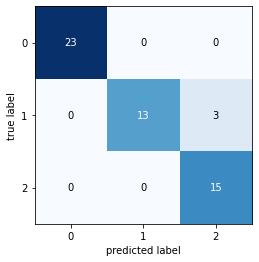

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Multilayer perceptron

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [ ]:
layers = [4,5,5,5,5,3] #4 features and 3 classes, 4 layers of 5 neurons

In [ ]:
mlp = MultilayerPerceptronClassifier(layers=layers,seed=1)

In [ ]:
model = mlp.fit(traindata)

In [ ]:
predictions = model.transform(testdata)

In [ ]:
predictions.select("features","label","prediction").show()

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.4,3.0,1.3,0.2]|  0.0|       0.0|
|[4.4,3.2,1.3,0.2]|  0.0|       0.0|
|[4.6,3.2,1.4,0.2]|  0.0|       0.0|
|[4.6,3.4,1.4,0.3]|  0.0|       0.0|
|[4.7,3.2,1.3,0.2]|  0.0|       0.0|
|[4.8,3.0,1.4,0.1]|  0.0|       0.0|
|[4.8,3.0,1.4,0.3]|  0.0|       0.0|
|[4.8,3.1,1.6,0.2]|  0.0|       0.0|
|[4.8,3.4,1.6,0.2]|  0.0|       0.0|
|[4.9,3.0,1.4,0.2]|  0.0|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|       0.0|
|[5.0,2.0,3.5,1.0]|  1.0|       1.0|
|[5.0,3.0,1.6,0.2]|  0.0|       0.0|
|[5.0,3.3,1.4,0.2]|  0.0|       0.0|
|[5.1,2.5,3.0,1.1]|  1.0|       1.0|
|[5.1,3.5,1.4,0.2]|  0.0|       0.0|
|[5.1,3.5,1.4,0.3]|  0.0|       0.0|
|[5.1,3.8,1.5,0.3]|  0.0|       0.0|
|[5.2,2.7,3.9,1.4]|  1.0|       1.0|
|[5.2,3.5,1.5,0.2]|  0.0|       0.0|
+-----------------+-----+----------+
only showing top 20 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error:",1- accuracy)

Test Error: 0.05555555555555558


In [ ]:
y_pred = predictions.select(["prediction"]).collect()
y_test = predictions.select(["label"]).collect()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      0.81      0.90        16
         2.0       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



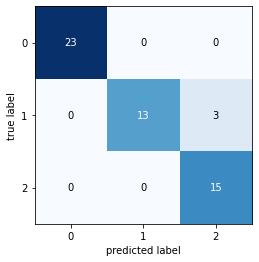

In [ ]:
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(labelCol="label",featuresCol="features")

In [ ]:
model = dt.fit(traindata)

In [ ]:
predictions = model.transform(testdata)

In [ ]:
predictions.select("features","label","prediction").show()

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.4,3.0,1.3,0.2]|  0.0|       0.0|
|[4.4,3.2,1.3,0.2]|  0.0|       0.0|
|[4.6,3.2,1.4,0.2]|  0.0|       0.0|
|[4.6,3.4,1.4,0.3]|  0.0|       0.0|
|[4.7,3.2,1.3,0.2]|  0.0|       0.0|
|[4.8,3.0,1.4,0.1]|  0.0|       0.0|
|[4.8,3.0,1.4,0.3]|  0.0|       0.0|
|[4.8,3.1,1.6,0.2]|  0.0|       0.0|
|[4.8,3.4,1.6,0.2]|  0.0|       0.0|
|[4.9,3.0,1.4,0.2]|  0.0|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|       0.0|
|[5.0,2.0,3.5,1.0]|  1.0|       1.0|
|[5.0,3.0,1.6,0.2]|  0.0|       0.0|
|[5.0,3.3,1.4,0.2]|  0.0|       0.0|
|[5.1,2.5,3.0,1.1]|  1.0|       1.0|
|[5.1,3.5,1.4,0.2]|  0.0|       0.0|
|[5.1,3.5,1.4,0.3]|  0.0|       0.0|
|[5.1,3.8,1.5,0.3]|  0.0|       0.0|
|[5.2,2.7,3.9,1.4]|  1.0|       1.0|
|[5.2,3.5,1.5,0.2]|  0.0|       0.0|
+-----------------+-----+----------+
only showing top 20 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error:",1- accuracy)

Test Error: 0.03703703703703709


In [ ]:
y_pred = predictions.select(["prediction"]).collect()
y_test = predictions.select(["label"]).collect()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.94      0.94      0.94        16
         2.0       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



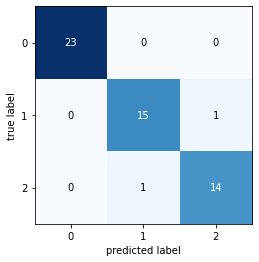

In [ ]:
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Combined Cycle Power Plant


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

**Attribute Information:**

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip

--2021-04-24 19:56:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3674852 (3.5M) [application/x-httpd-php]
Saving to: ‘CCPP.zip’

CCPP.zip            100%[===================>]   3.50M  5.78MB/s    in 0.6s    

2021-04-24 19:56:48 (5.78 MB/s) - ‘CCPP.zip’ saved [3674852/3674852]



In [ ]:
!unzip '/content/CCPP.zip'

Archive:  /content/CCPP.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


In [ ]:
!rm '/content/CCPP.zip'

In [ ]:
%cd ./CCPP

/content/CCPP


In [82]:
!rm Readme.txt & rm Folds5x2_pp.ods

In [83]:
import pandas as pd

In [87]:
excel_df = pd.read_excel('/content/CCPP/Folds5x2_pp.xlsx',sheet_name='Sheet1',header=0)
excel_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [88]:
excel_df.count()

AT    9568
V     9568
AP    9568
RH    9568
PE    9568
dtype: int64

In [89]:
ccpp = spark.createDataFrame(excel_df)
ccpp.show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



In [92]:
ccpp.printSchema()

root
 |-- AT: double (nullable = true)
 |-- V: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- RH: double (nullable = true)
 |-- PE: double (nullable = true)



In [93]:
ccpp_feat = VectorAssembler(inputCols=ccpp.columns[:-1],outputCol="features").transform(ccpp)
ccpp_feat.show()

+-----+-----+-------+-----+------+--------------------+
|   AT|    V|     AP|   RH|    PE|            features|
+-----+-----+-------+-----+------+--------------------+
|14.96|41.76|1024.07|73.17|463.26|[14.96,41.76,1024...|
|25.18|62.96|1020.04|59.08|444.37|[25.18,62.96,1020...|
| 5.11| 39.4|1012.16|92.14|488.56|[5.11,39.4,1012.1...|
|20.86|57.32|1010.24|76.64|446.48|[20.86,57.32,1010...|
|10.82| 37.5|1009.23|96.62| 473.9|[10.82,37.5,1009....|
|26.27|59.44|1012.23|58.77|443.67|[26.27,59.44,1012...|
|15.89|43.96|1014.02|75.24|467.35|[15.89,43.96,1014...|
| 9.48|44.71|1019.12|66.43|478.42|[9.48,44.71,1019....|
|14.64| 45.0|1021.78|41.25|475.98|[14.64,45.0,1021....|
|11.74|43.56|1015.14|70.72| 477.5|[11.74,43.56,1015...|
|17.99|43.72|1008.64|75.04|453.02|[17.99,43.72,1008...|
|20.14|46.93|1014.66|64.22|453.99|[20.14,46.93,1014...|
|24.34| 73.5|1011.31|84.15|440.29|[24.34,73.5,1011....|
|25.71|58.59|1012.77|61.83|451.28|[25.71,58.59,1012...|
|26.19|69.34|1009.48|87.59|433.99|[26.19,69.34,1

# Linear regression

In [90]:
from pyspark.ml.regression import LinearRegression

In [95]:
lr = LinearRegression(labelCol="PE",featuresCol="features")

In [106]:
model_lr = lr.fit(ccpp_feat)

In [107]:
model_lr.coefficients

DenseVector([-1.9775, -0.2339, 0.0621, -0.1581])

In [108]:
model_lr.intercept

454.6092743819712

In [109]:
model_lr.summary.rootMeanSquaredError

4.557126016749486

In [110]:
model_lr.save('lr.model')

# Decision tree Regression

In [116]:
(traindata,testdata) = ccpp_feat.randomSplit([0.7,0.3],3)

In [117]:
from pyspark.ml.regression import DecisionTreeRegressor

In [118]:
dtr = DecisionTreeRegressor(labelCol="PE",featuresCol="features")

In [119]:
model_dtr = dtr.fit(traindata)

In [120]:
predictions = model_dtr.transform(testdata)

In [121]:
predictions.select("features","PE","prediction").show()

+--------------------+------+-----------------+
|            features|    PE|       prediction|
+--------------------+------+-----------------+
|[3.0,39.64,1011.0...| 485.2|486.8385326086957|
|[3.26,41.31,996.3...|489.38|486.8385326086957|
|[3.38,41.31,998.7...|489.11|486.8385326086957|
|[3.6,35.19,1018.7...|488.98|486.8385326086957|
|[3.82,35.47,1016....|489.04|486.8385326086957|
|[3.91,35.47,1016....|488.67|486.8385326086957|
|[3.94,39.9,1008.0...|488.81|486.8385326086957|
|[3.95,38.44,1016....|492.46|486.8385326086957|
|[3.96,35.47,1016....|489.68|486.8385326086957|
|[4.08,35.19,1018....|489.44|486.8385326086957|
|[4.11,38.44,1015....|488.05|486.8385326086957|
|[4.24,39.9,1009.2...|491.25|486.8385326086957|
|[4.31,38.5,1011.7...|492.92|486.8385326086957|
|[4.41,42.07,1005....|488.36|486.8385326086957|
|[4.62,38.44,1016....|486.84|486.8385326086957|
|[4.73,41.31,999.7...| 486.6|486.8385326086957|
|[4.77,39.33,1011....|494.91|486.8385326086957|
|[4.83,38.44,1015....|485.32|486.8385326

In [122]:
from pyspark.ml.evaluation import RegressionEvaluator

In [123]:
dtr_eval = RegressionEvaluator(labelCol="PE",predictionCol="prediction",metricName="rmse")
rmse = dtr_eval.evaluate(predictions)
rmse

4.637566014056199

#Gradient-boosted tree regression

In [125]:
from pyspark.ml.regression import GBTRegressor

In [126]:
gbt = GBTRegressor(labelCol="PE",featuresCol="features")

In [127]:
model_gbt = gbt.fit(traindata)

In [128]:
predictions = model_gbt.transform(testdata)

In [129]:
predictions.select("features","PE","prediction").show()

+--------------------+------+------------------+
|            features|    PE|        prediction|
+--------------------+------+------------------+
|[3.0,39.64,1011.0...| 485.2|488.06499449234906|
|[3.26,41.31,996.3...|489.38|  487.115727891232|
|[3.38,41.31,998.7...|489.11|  487.115727891232|
|[3.6,35.19,1018.7...|488.98| 487.0330361902605|
|[3.82,35.47,1016....|489.04|  486.917083111445|
|[3.91,35.47,1016....|488.67|  486.917083111445|
|[3.94,39.9,1008.0...|488.81|488.20615385213637|
|[3.95,38.44,1016....|492.46|487.70764719969566|
|[3.96,35.47,1016....|489.68|  486.917083111445|
|[4.08,35.19,1018....|489.44| 487.0330361902605|
|[4.11,38.44,1015....|488.05| 488.9251765103536|
|[4.24,39.9,1009.2...|491.25|488.20615385213637|
|[4.31,38.5,1011.7...|492.92|488.96782748811495|
|[4.41,42.07,1005....|488.36| 487.8518305121705|
|[4.62,38.44,1016....|486.84| 488.0869036488763|
|[4.73,41.31,999.7...| 486.6|  487.115727891232|
|[4.77,39.33,1011....|494.91| 488.8544549073517|
|[4.83,38.44,1015...

In [131]:
gbt_eval = RegressionEvaluator(labelCol="PE",predictionCol="prediction",metricName="rmse")
rmse = gbt_eval.evaluate(predictions)
rmse #menor é melhor

4.277159215907455